In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload

# Load dataset 

In [11]:
from datasets import load_dataset

ds = load_dataset("maharshipandya/spotify-tracks-dataset")

In [12]:
df = ds['train'].to_pandas()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [13]:
df.track_genre.value_counts(normalize=True)

track_genre
acoustic             0.008772
punk-rock            0.008772
progressive-house    0.008772
power-pop            0.008772
pop                  0.008772
                       ...   
folk                 0.008772
emo                  0.008772
electronic           0.008772
electro              0.008772
world-music          0.008772
Name: proportion, Length: 114, dtype: float64

In [14]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [15]:
df.dropna(inplace=True)

In [16]:
df1 = df[((df.tempo != 0) & (df.time_signature != 0))]

In [17]:
df1.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113836.000000,1.138360e+05,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000,113836.000000
mean,33.233476,2.281096e+05,0.567590,0.642112,5.309199,-8.239513,0.637496,0.084770,0.314642,0.155362,0.213228,0.474725,122.316220,3.909624
std,22.316549,1.063084e+05,0.172379,0.250786,3.559429,4.992758,0.480725,0.105762,0.332332,0.308884,0.189932,0.258841,29.653809,0.406909
min,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,1.000000
25%,17.000000,1.741980e+05,0.456000,0.473000,2.000000,-10.002000,0.000000,0.035900,0.016900,0.000000,0.098000,0.261000,99.430500,4.000000
50%,34.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.998000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000
75%,50.000000,2.615870e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084600,0.597000,0.047700,0.273000,0.683000,140.078000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [18]:
df1['mode'].value_counts(normalize=True)

mode
1    0.637496
0    0.362504
Name: proportion, dtype: float64

<Axes: xlabel='tempo', ylabel='Count'>

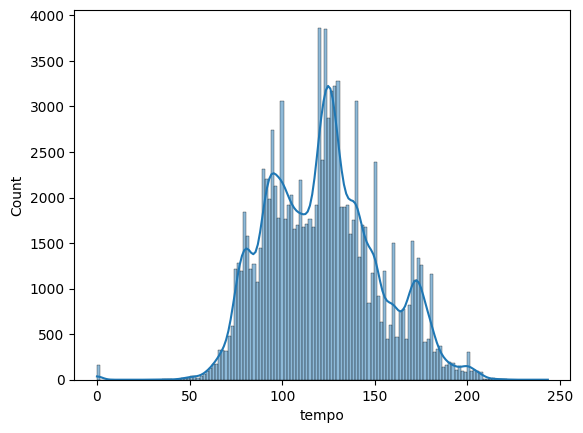

In [19]:
sns.histplot(df.tempo, kde=True)

<Axes: xlabel='tempo', ylabel='Count'>

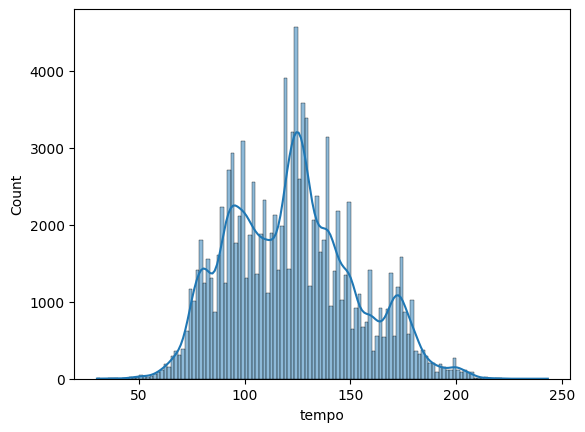

In [20]:
sns.histplot(df1.tempo, kde=True)

<Axes: xlabel='popularity', ylabel='Count'>

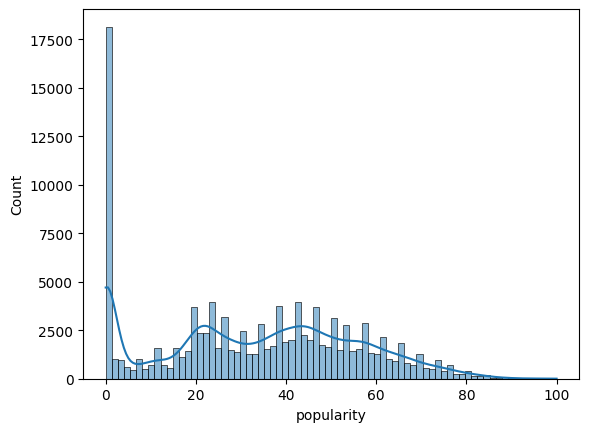

In [21]:
sns.histplot(df1.popularity, kde=True)

In [22]:
df1[df1.popularity==0].sample(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
32990,66NmF8BL1I4wANjcnrBtjl,Pongo,Best African Club Tunes,Wegue Wegue,0,204835,False,0.874,0.854,8,-6.368,1,0.1010,0.35100,0.000105,0.0896,0.506,135.019,4,electronic
3340,0txb2qyDV7sVBLv2KvtbW2,Andrés Calamaro;Julio Iglesias,Música para casa,Bohemio,0,208004,False,0.784,0.461,4,-9.546,0,0.0314,0.66200,0.000059,0.1070,0.733,102.165,4,alternative
21121,4Z5JuznV11cjmBaBIu80Gb,Yxng Bane,New RnB,Table for Two,0,154374,True,0.918,0.477,5,-5.090,1,0.0560,0.32000,0.000002,0.0719,0.680,99.959,4,dancehall
57219,5n3vjDXcIR4gS9hkNFdGvI,Cavetown,Here to Forever - All New Indie,Grocery Store,0,134956,False,0.577,0.555,8,-8.228,1,0.0352,0.58300,0.000066,0.1050,0.437,132.336,4,indie
76028,7grUSN7Q4HDfm6D7zqtr7W,Il Volo,Christmas 2022,Christmas Medley: Jingle Bells Rock / Let It S...,0,219160,False,0.427,0.587,2,-5.527,1,0.0330,0.64200,0.000000,0.3150,0.579,130.144,4,opera
82043,4MCWSjTJyWPjJ9P8JCAMZL,The Cars,Maintain Your Mojo,Just What I Needed,0,225893,False,0.640,0.627,4,-9.048,1,0.0428,0.00948,0.000134,0.0764,0.793,127.070,4,power-pop
83142,5JAqpsCQzkW5LbLgPPLNec,Nicky Romero;Norma Jean Martine,EDM Gaming Music Autumn/Winter 2022,I Hope That It Hurts,0,160214,False,0.723,0.771,2,-5.407,1,0.1520,0.04500,0.000000,0.0809,0.533,110.048,4,progressive-house
86449,75vBeICzLafF3LOs1rC3DH,The Stooges,Timeless Rock Hits,I Wanna Be Your Dog,0,190440,False,0.541,0.913,4,-8.030,1,0.0359,0.06810,0.052100,0.4140,0.113,120.634,4,punk
64696,4fLrPy9wjGuRjGAnWvNvcX,Vince Guaraldi Trio,Ultimate Calm Christmas Jazz,O Tannenbaum,0,309386,False,0.577,0.191,5,-15.938,1,0.0405,0.90800,0.008240,0.1260,0.343,123.338,4,jazz
57141,02kqIWKi4zOQ2hIjUAfhqb,Ellie Goulding,pov: it's 2019,Flux,0,230973,False,0.509,0.415,0,-6.502,1,0.0272,0.85600,0.000000,0.1400,0.393,93.576,4,indie


In [23]:
df2 = df1[df1.popularity!=0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97821 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          97821 non-null  object 
 1   artists           97821 non-null  object 
 2   album_name        97821 non-null  object 
 3   track_name        97821 non-null  object 
 4   popularity        97821 non-null  int64  
 5   duration_ms       97821 non-null  int64  
 6   explicit          97821 non-null  bool   
 7   danceability      97821 non-null  float64
 8   energy            97821 non-null  float64
 9   key               97821 non-null  int64  
 10  loudness          97821 non-null  float64
 11  mode              97821 non-null  int64  
 12  speechiness       97821 non-null  float64
 13  acousticness      97821 non-null  float64
 14  instrumentalness  97821 non-null  float64
 15  liveness          97821 non-null  float64
 16  valence           97821 non-null  float64
 1

In [24]:
df2.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,97821.000000,9.782100e+04,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000,97821.000000
mean,38.674375,2.304803e+05,0.566562,0.646554,5.305660,-8.243929,0.634424,0.086542,0.310430,0.164002,0.217556,0.469450,122.874967,3.912442
std,19.213006,1.095880e+05,0.171381,0.249533,3.552816,4.945889,0.481594,0.110241,0.329577,0.315355,0.195331,0.258156,29.591444,0.403738
min,1.000000,2.426600e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.322000,1.000000
25%,23.000000,1.756130e+05,0.457000,0.477000,2.000000,-10.044000,0.000000,0.035900,0.014600,0.000000,0.098500,0.256000,99.977000,4.000000
50%,39.000000,2.155040e+05,0.578000,0.688000,5.000000,-7.064000,1.000000,0.049100,0.167000,0.000059,0.133000,0.456000,122.866000,4.000000
75%,53.000000,2.654260e+05,0.693000,0.858000,8.000000,-5.024000,1.000000,0.085700,0.588000,0.070300,0.280000,0.676000,141.167000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [25]:
df2.time_signature.value_counts(normalize=True)

time_signature
4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: proportion, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

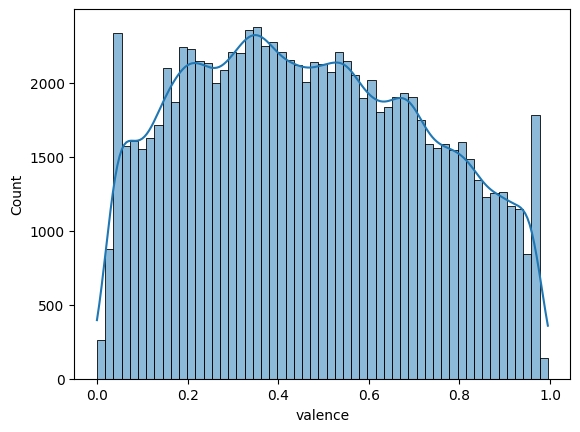

In [26]:
sns.histplot(df2.valence, kde=True)

<Axes: xlabel='loudness', ylabel='danceability'>

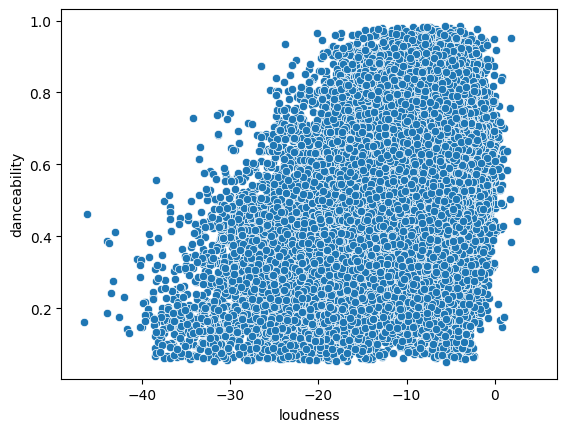

In [27]:
sns.scatterplot(data=df2, x='loudness', y='danceability')

In [28]:
df2.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

# Preproc

In [29]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [30]:
keep_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

cat_col = ['key', 'mode', 'time_signature']

num_col = ['duration_ms', 'danceability', 'energy','loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

In [31]:
for col in cat_col:
    print(df2[col].value_counts(normalize=True))
    print('---------------')

key
7     0.117592
0     0.112215
2     0.104732
9     0.099580
1     0.094796
11    0.081864
4     0.081434
5     0.081026
6     0.069453
10    0.064158
8     0.062584
3     0.030566
Name: proportion, dtype: float64
---------------
mode
1    0.634424
0    0.365576
Name: proportion, dtype: float64
---------------
time_signature
4    0.898437
3    0.077284
5    0.015641
1    0.008638
Name: proportion, dtype: float64
---------------


<Axes: >

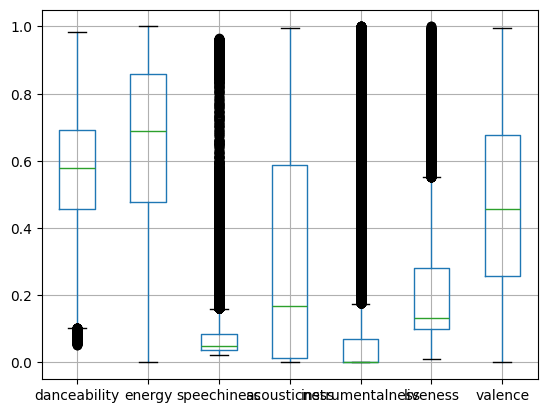

In [32]:
df2[['danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']].boxplot()

## Features preprocessing

In [33]:
import string
def basic_cleaning(sentence):
    # TODO: Apply all cleaning methods used above
    # 1. Lowercasing
    sentence = sentence.lower()
    # 2. Removing whitespaces
    sentence = sentence.strip()

    return sentence

In [34]:
df2_copy = df2.copy()

In [35]:
df2_copy['track_name'] = df2_copy['track_name'].map(lambda x: basic_cleaning(x))
df2_copy['artists'] = df2_copy['artists'].map(lambda x: basic_cleaning(x))


In [36]:
# Groupby artist name and track name, keeping only the most popular version of the song
df2_copy = df2_copy.groupby(['track_name', 'artists'], as_index=False).max()

In [37]:
X = df2_copy[keep_columns]

In [38]:
num_preproc = Pipeline([
    ("scaler", RobustScaler())
])
cat_preproc = Pipeline([
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [39]:
preproc = make_column_transformer(
    (num_preproc, num_col),
    (cat_preproc, cat_col),
    remainder='drop'
)
preproc_pipe = make_pipeline(preproc)

In [40]:
X_preproc = preproc_pipe.fit_transform(X)

In [54]:
X_preproc.shape

(76314, 28)

# Model test

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [56]:
pca = PCA()
X_PCA = pca.fit(X_preproc)

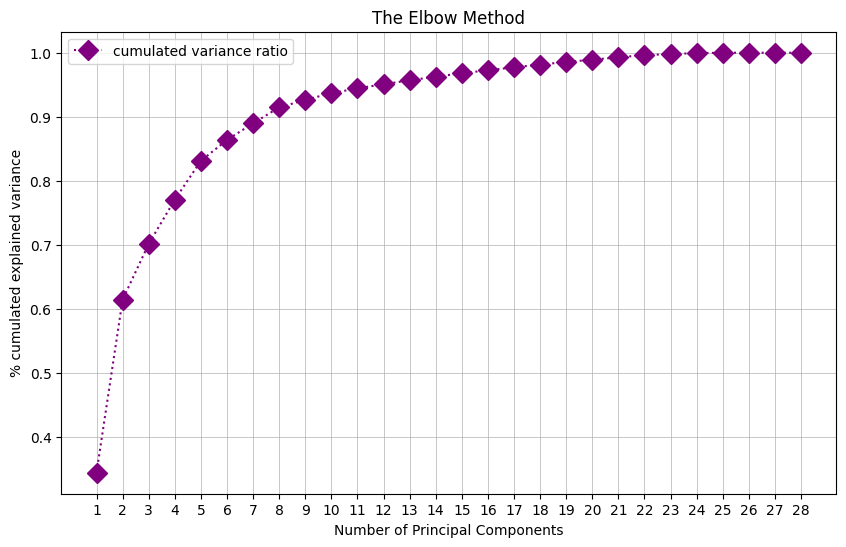

In [57]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)

    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

In [58]:
threhsold_pca = 10
pca = PCA(n_components=threhsold_pca, whiten=True)
pca.fit(X_preproc)
X_proj = pd.DataFrame(pca.transform(X_preproc))
X_proj

,0,1,2,3,4,5,6,7,8,9
0,-1.147457,0.725275,-0.415206,0.212712,-1.180385,0.372319,-1.289365,0.496071,-0.683312,-0.696880
1,-0.131647,-0.755679,-0.985748,-0.332862,-0.452679,0.923092,0.823137,0.982811,1.538025,0.068105
2,-0.506131,-0.442884,-1.018229,0.954980,-0.713855,0.316088,-0.723217,-0.485166,1.060281,-0.579524
3,-0.402432,-0.599335,0.112982,0.900261,1.106089,0.151342,-0.032007,-1.219590,-0.576507,-0.571372
4,-0.495699,0.119877,0.912800,-0.238720,-0.332345,-2.358363,-0.342541,-0.655143,0.145585,-1.331409
...,...,...,...,...,...,...,...,...,...,...
76309,-0.019298,-0.681387,-0.600044,-1.390025,-0.139955,-1.292508,-0.386900,-0.026071,-0.947374,1.472633
76310,-0.409286,-0.541776,-0.029347,0.543359,-0.481665,0.005830,-0.258308,-1.140572,0.316580,0.152377
76311,1.936830,1.323293,-1.369493,-0.461175,0.027711,-0.631348,-1.137390,0.826190,-1.480218,0.651758
76312,1.970917,1.170385,-0.521381,-0.129003,-0.044899,-0.135184,-1.702479,1.245180,0.130531,1.250418


In [59]:
kmeans_pca = KMeans(n_clusters = 8)
kmeans_pca.fit(X_proj)
kmeans_pca

KMeans()

In [60]:
nb_clusters_to_try = np.arange(1,115,1)
nb_clusters_to_try

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [61]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(X_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
working with 21 clusters...
working with 22 clusters...
working with 23 clusters...
working with 24 clusters...
working with 25 clusters...
working with 26 clusters...
working with 27 clusters...
working with 28 clusters...
working with 29 clusters...
working with 30 clusters...
working with 31 clusters...
working with 32 clusters...
working with 33 clusters...
working with 34 clusters...
working with 35 clusters...
working with 36 clusters...
w

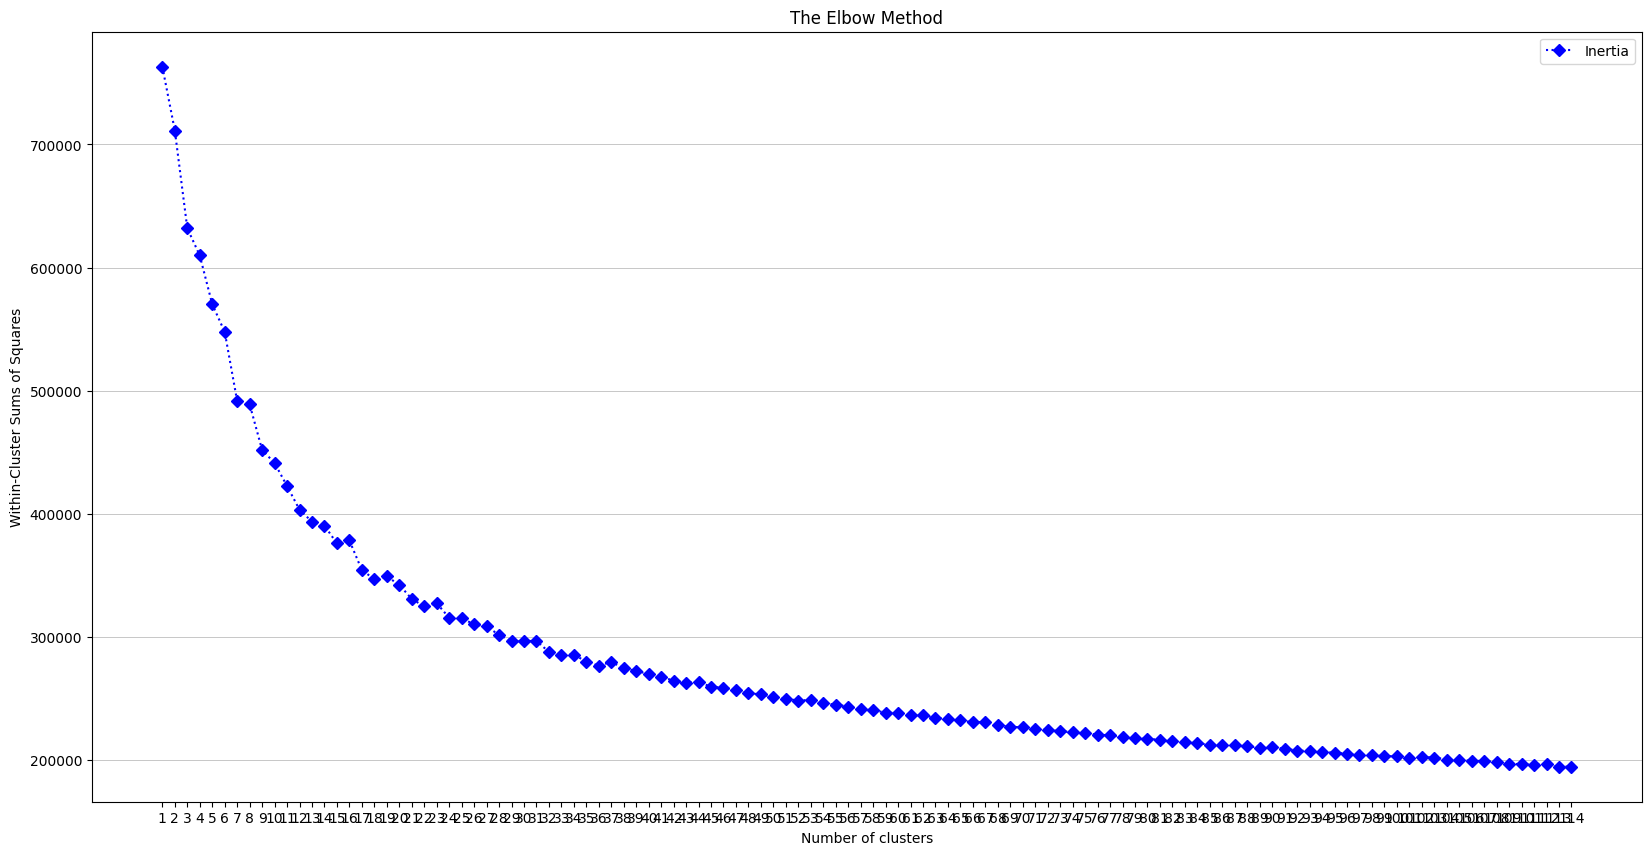

In [62]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    # annotate


    ax.grid(axis="y",linewidth=0.5)
    plt.show()

In [63]:
kmeans_114 = KMeans(n_clusters = 114)
kmeans_114.fit(X_proj)
labelling_114 = kmeans_114.labels_

In [64]:
X_label = pd.concat([df2_copy,pd.Series(labelling_114)],axis=1).rename(columns={0:"label"})
X_label[(X_label.label == 3)& (X_label.popularity < 10)]

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label
181,"1, 2, 3",sofía reyes;jason derulo;de la ghetto,2Itt7WXHfg02UUHYBBuxmH,Hits Hits Hits,1,201526,False,0.792,0.895,1,...,0,0.0587,0.16500,0.000000,0.0501,0.793,94.968,4,latin,3
556,2step,ed sheeran;lil baby,4eAWt9AjcjdNk1L2uIhFCT,New Arrivals,2,163449,False,0.693,0.643,4,...,0,0.0828,0.13800,0.000000,0.1080,0.477,95.055,4,pop,3
1683,abc boo,super simple songs,5iNn43bKN1jSLllFkEfdOg,ABC Boo,1,192395,False,0.661,0.459,2,...,0,0.0868,0.16000,0.000000,0.3530,0.481,71.914,4,children,3
3714,amsterdam,harris & ford;2 engel & charlie,2JW4kMMMGxr8LxZeKeBYJF,Layla sitzt dicht im Flieger,2,126133,False,0.702,0.839,6,...,0,0.0744,0.02320,0.000261,0.0932,0.348,112.516,1,party,3
7147,better days,neiked;mae muller;polo g,5Ewv1Onq6GMnoWxyuChLIW,Mega Hits Autumn/Fall 2022,1,160656,False,0.717,0.671,0,...,0,0.0337,0.00180,0.000003,0.0921,0.699,110.054,4,house,3
8244,bobo,mariah angeliq;bad gyal;maria becerra,4ZTbRAF9eAiV1RPLyzESV0,Reggeaton Imperdible,2,224760,True,0.714,0.818,8,...,0,0.0532,0.07240,0.000000,0.1150,0.541,92.004,4,latino,3
11535,christian dior,jhayco,5t22v52YE4S82SVLYUhYSw,Frescura y Perreo,1,147133,True,0.835,0.718,7,...,0,0.0694,0.22600,0.000002,0.1080,0.427,92.028,4,reggaeton,3
12434,comfortable,bebe rexha;kranium,0qh91qPrnhoOhsiNZYOWrN,African Heat - Afro Hits,1,204235,False,0.714,0.600,7,...,0,0.0644,0.39200,0.000007,0.2920,0.506,105.109,4,dance,3
15323,deseos,jhayco;bryant myers,37o1JVuF7NnYWKYzLCe32r,Halloween 2022 Perreo Vol. 5,2,220080,False,0.822,0.726,11,...,0,0.0593,0.28000,0.000000,0.1820,0.691,93.014,4,reggaeton,3
15758,diamonds,sam smith,3tj1y5eQNFMcXnkH0AcXTm,pov: it's 2020,3,213869,False,0.653,0.667,10,...,0,0.0423,0.15400,0.000000,0.1070,0.556,104.181,4,pop,3


In [65]:
X_label

,track_name,artists,track_id,album_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,label
0,!i'll be back!,rilès,0fROT4kK5oTm8xO8PX6EJF,!I'll Be Back!,52,178533,True,0.823,0.612,1,...,1,0.2480,0.168000,0.000000,0.1090,0.6880,142.959,4,french,90
1,"""a"" you're adorable",brian hyland,1hH0t381PIXmUVWyG1Vj3p,The Bashful Blond,39,151680,False,0.615,0.375,0,...,0,0.0319,0.482000,0.000000,0.1110,0.9220,110.720,4,rockabilly,35
2,"""c"" is for cookie",little apple band,73lXf5if6MWVWnsgXhK8bd,The Favorite Songs Of Sesame Street,32,86675,False,0.664,0.812,3,...,1,0.0886,0.132000,0.000010,0.0794,0.8710,118.443,4,kids,8
3,"""contemplate this on the tree of woe.""",dillinger four,5Zx0Rrkn5RFBMD2PRxX3mI,C I V I L W A R,24,180706,False,0.565,0.977,11,...,1,0.0546,0.028200,0.001320,0.4330,0.3870,106.478,4,power-pop,112
4,"""devils never cry""(スタッフロール)",capcom sound team,3ozivYJGJGq6TSzdy8m64X,デビル メイ クライ 3 オリジナル・サウンドトラック,55,319906,False,0.264,0.951,7,...,1,0.1460,0.000894,0.044200,0.1270,0.1590,149.990,4,anime,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76309,내 맘을 볼 수 있나요,heize,2oVHb8wyg6oC2iNpGBNvx1,Hotel del Luna (Original Television Soundtrack...,63,225785,False,0.397,0.166,9,...,1,0.0349,0.884000,0.000000,0.1000,0.1310,134.708,4,k-pop,50
76310,시작,gaho,4kIpBfvK44bxqX7zo8K1oP,ITAEWON CLASS (Original Television Soundtrack)...,65,202440,False,0.591,0.818,4,...,1,0.0730,0.172000,0.000000,0.1260,0.5740,108.107,4,k-pop,42
76311,약속 (piano solo),yiruma,4mHc7LUlO3k6AXeFV2EiJK,Yiruma Official Album 'Piano Therapy' (The Ori...,37,144533,False,0.504,0.143,1,...,1,0.0701,0.980000,0.922000,0.1240,0.0584,148.786,4,new-age,108
76312,원펀맨 theme - sad theme,goda,0tQesiSZJQOdHeAC7r59us,One Punch Man (Original Soundtrack),37,228000,False,0.542,0.337,2,...,1,0.0539,0.985000,0.933000,0.1470,0.4430,159.951,4,piano,108


# KNeighbors



In [68]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X_preproc)


NearestNeighbors(metric='cosine')

In [71]:
def find_similar_songs(song_index, num_songs=5):
    distances, indices = knn.kneighbors([X_preproc[song_index]], n_neighbors=num_songs+1)
    similar_songs = df.iloc[indices[0][1:]]  # Exclude the input song itself
    return similar_songs


In [72]:
random_song_index = np.random.randint(0, len(df))
similar_songs = find_similar_songs(random_song_index)

In [73]:
print(f"Similar songs for track at index {random_song_index}:")
print(similar_songs[["artists", "track_name", "popularity", "tempo", "track_genre"]])

Similar songs for track at index 61689:
                           artists  \
9515   Rodrigo Azevedo;Fernandinho   
2986                     The Adams   
74476               Roberto Carlos   
2073                    Weezer;AJR   
20695           Robin Schulz;Alida   

                                           track_name  popularity    tempo  \
9515                                 Volta Logo Jesus          45  135.683   
2986                                          Waiting          45  139.927   
74476  Do Fundo do Meu Coração - Versão Remasterizada          42   75.948   
2073                            All My Favorite Songs           0   84.962   
20695                                    In Your Eyes           3  120.018   

      track_genre  
9515       brazil  
2986     alt-rock  
74476         mpb  
2073     alt-rock  
20695       dance  
